<a href="https://colab.research.google.com/github/dariaAlium/iad/blob/master/Lab_3_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [2]:
#!pip install scikit-plot
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import RadiusNeighborsClassifier
from  sklearn import preprocessing 
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.loc[data['G3'] == 0]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
71,156109,Por,MS,M,18,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,no,5.0,4,3,4.0,3.0,3,0,NaN,7,7,0
83,163217,Por,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,other,2,2,3,no,yes,no,yes,yes,no,no,yes,3.0,5,4,1.0,4.0,1,0,yes,8,0,0
152,218048,Math,GP,M,18,R,GT3,T,2,2,services,other,reputation,mother,1,1,2,no,yes,no,yes,yes,yes,yes,no,3.0,3,3,1.0,2.0,4,0,NaN,7,4,0
178,243472,Math,GP,F,18,R,GT3,T,2,2,at_home,other,course,mother,2,4,0,no,no,no,yes,yes,yes,no,no,4.0,4,4,1.0,1.0,4,0,NaN,10,9,0
184,247347,Math,GP,M,16,U,GT3,T,3,4,other,other,course,father,3,1,2,no,yes,no,yes,no,yes,yes,no,3.0,4,5,2.0,4.0,2,0,yes,6,5,0
229,285793,Math,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,2,no,yes,no,no,yes,yes,yes,yes,4.0,2,2,2.0,2.0,5,0,no,12,0,0
241,298547,Math,GP,M,18,U,GT3,T,4,4,teacher,services,home,father,1,2,1,no,yes,no,yes,yes,yes,yes,no,4.0,3,3,2.0,2.0,2,0,NaN,10,10,0
265,325702,Por,MS,M,16,R,GT3,T,2,1,other,services,reputation,mother,2,2,0,no,no,no,yes,yes,yes,yes,no,5.0,2,1,1.0,1.0,2,0,NaN,8,7,0
278,337797,Por,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,no,no,no,yes,yes,yes,3.0,2,2,4.0,2.0,5,0,yes,7,5,0
292,348379,Math,GP,M,16,U,LE3,T,1,2,other,other,course,mother,2,1,1,no,no,no,yes,yes,yes,no,no,4.0,4,4,2.0,4.0,5,0,NaN,7,0,0


In [5]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


In [6]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

### Пропущенные данные

In [7]:
A = data.isnull()
print('Missing values by features:', A.sum(), sep='\n')
print('Missing values :', A.sum().sum(),)

data.drop(['cheating'], axis='columns', inplace=True)

Missing values by features:
ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64
Missing values : 740


таким образом видим, что колонка списовальщиков заполнена меньше всего. удалили ее.

In [8]:
data.loc[(data['Dalc'].isnull()) & (data['Walc'].isnull())]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


спойлер из прошлой работы: алкоголь по выходным и алкоголь в будни сильно кореллируют
и нет строк,  там где прощенно и то и то 
поэтому поставим вместо значения компаньена

In [0]:
data['Dalc'] = data['Dalc'].fillna(data['Walc'])
data['Walc'] = data['Walc'].fillna(data['Dalc'])

спойлер: романтические отношения не сильно влиют на оценку за семестр, поставим 
там 0, а вот отношения
в семье напротив, поэтому если ребенок употребялет по выходным больше 1.0, 
то ставим отношения 1.0 а если 1.0 то наоборот поставим 3.0 (если бы отношения были
прекрасные, то не было бы нужды ставить NaN, согласитесь!)

In [10]:
data['romantic'] = data['romantic'].fillna('no')
data.loc[(data['famrel'].isnull())]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
85,164833,Por,GP,F,16,U,GT3,T,2,2,services,other,reputation,mother,2,2,0,no,no,no,yes,no,yes,yes,no,NaN,4,4,1.0,4.0,5,0,13,12,14
116,189712,Math,GP,M,16,U,LE3,A,3,4,services,other,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,NaN,3,3,1.0,1.0,5,4,11,11,11
146,212614,Math,GP,F,19,U,LE3,T,1,1,at_home,other,reputation,other,1,2,1,yes,yes,no,yes,no,yes,yes,no,NaN,4,3,1.0,3.0,3,18,12,10,10
159,224690,Por,GP,M,17,U,LE3,T,2,3,services,services,reputation,father,1,2,0,no,yes,no,no,no,yes,yes,no,NaN,3,3,1.0,3.0,3,0,10,11,11
398,434990,Por,GP,M,16,U,GT3,T,4,4,health,other,course,mother,1,1,0,no,yes,no,yes,yes,yes,yes,no,NaN,4,4,1.0,4.0,5,4,12,13,13
434,469435,Math,MS,M,19,R,GT3,T,1,1,other,other,home,other,3,1,1,no,yes,no,no,yes,yes,yes,no,NaN,4,4,3.0,3.0,5,4,8,8,8
455,486246,Por,GP,F,15,U,GT3,T,4,4,services,teacher,other,father,1,2,0,yes,yes,no,yes,no,yes,yes,no,NaN,4,4,1.0,1.0,3,2,13,12,12
478,504919,Por,GP,F,19,U,LE3,A,2,3,at_home,other,home,other,2,1,1,no,no,no,no,yes,no,yes,no,NaN,2,3,3.0,4.0,5,16,10,11,11
602,624719,Por,GP,M,18,R,LE3,T,3,2,services,other,reputation,mother,2,3,0,no,yes,no,yes,yes,yes,yes,no,NaN,4,2,1.0,1.0,4,0,14,15,15
820,807503,Math,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,NaN,4,1,1.0,1.0,1,0,13,14,15


можно вернуться на код с проверкой нулевых значений и посмотреть что пропущенных значений нет
а можно поверить мне на слово

In [11]:
data['famrel'].loc[(data['Walc'] > 1)] = data['famrel'].loc[(data['Walc'] > 1)].fillna(3.0)
data['famrel'].loc[(data['Walc'] == 1)] = data['famrel'].loc[(data['Walc'] == 1)].fillna(3.0)
data.loc[(data['famrel'].isnull())]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


### Из категориальных в численные

я буду руками изменять значения категориальных признаков на числовые, чтобы потом
знать какая цифра что обозначает 


Также, я ставила наибольшую цифру таму параметру, который вероятно имеют ученики 
с наибольшим баллом

В некоторых случаях цифра ставилась рандомно

In [12]:
list_of_names = {'Subject': {'Por': 1, 'Math': 0}, 'school': {'GP': 1, 'MS':0},
                 'sex': {'F': 1, 'M': 0, 'm': 0}, 'address': {'U': 1, 'R': 0}, 'famsize': 
                 {'GT3': 0, 'LE3': 1}, 'Pstatus': {'A': 0, 'T': 1, 't': 1}, 'Mjob': 
                 {'services': 2, 'other': 0, 'health': 1, 'at_home': 3, 'teacher': 4, 'at-home':3}, 
                 'Fjob': {'services': 2, 'other': 0, 'health': 1, 'at_home': 3, 'at-home':3,
                          'teacher': 4}, 'reason': {'course': 2, 'home': 0, 'reputation': 1, 'other': 0},
                 'guardian': {'father': 1, 'mother': 2, 'other':0, 'futher': 1}, 'schoolsup': 
                 {'no': 0, 'yes': 1}, 'famsup': {'no': 0, 'yes': 1}, 'paid':
                 {'no': 1, 'yes': 0}, 'activities': {'no': 0, 'yes': 1}, 'nursery':
                 {'no': 0, 'yes': 1}, 'higher': {'no': 0, 'yes': 1}, 'internet':
                 {'no': 0, 'yes': 1}, 'romantic': {'no': 1, 'yes': 0}, 'Medu': {
                  '0':0,'1':1, '2':2, '3':3, '4':4, 'o': 0}, 'Fedu': { '0':1,'1':1, '2':2, '3':3, '4':4, 'o': 0}
                 }
for i in data.columns.tolist():
  if i in list_of_names:
    data[i] = data[i].map(list_of_names[i])
data

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,1,1,1,16,1,0,0,3,4,2,0,2,1,1,1,0,0,0,1,0,1,1,1,1,3.0,2,1,1.0,4.0,5,12,15,13,14
1,101021,1,1,1,17,1,0,1,3,2,0,0,2,2,1,2,0,0,0,1,1,0,1,1,1,5.0,3,4,1.0,3.0,3,2,17,18,17
2,102965,1,1,0,16,1,1,1,1,2,1,2,2,2,2,1,2,0,0,1,0,0,1,1,1,4.0,4,5,3.0,5.0,5,0,9,8,10
3,102989,1,0,0,17,1,0,1,2,3,0,2,0,1,2,2,0,0,0,1,1,1,1,1,1,4.0,4,3,1.0,1.0,3,4,14,15,16
4,103131,1,1,1,16,1,0,1,1,1,3,0,0,2,2,1,0,0,1,1,0,1,1,0,1,4.0,3,2,1.0,4.0,5,2,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,0,1,1,15,0,0,1,3,3,2,2,1,0,2,3,2,0,1,0,1,1,1,1,0,4.0,2,1,2.0,3.0,3,8,10,10,10
1040,997897,1,1,0,15,0,0,1,2,1,1,2,1,2,1,2,0,0,0,1,1,1,1,1,0,5.0,4,2,1.0,1.0,5,4,10,9,10
1041,998425,1,0,1,16,0,1,1,1,1,3,0,2,1,3,2,0,0,1,1,0,1,1,0,1,5.0,3,2,1.0,1.0,1,0,16,17,18
1042,999143,1,1,0,16,1,0,1,2,1,3,0,2,2,4,1,0,0,0,1,0,1,1,0,1,3.0,2,1,1.0,1.0,2,4,9,9,11


тут я поняла что в образовании матери и отца есть клетка с о 

ID


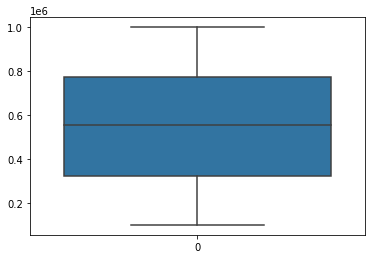

Subject


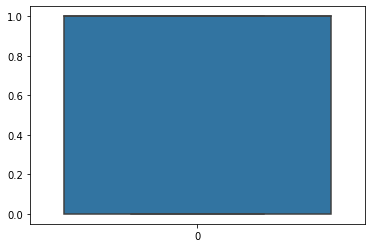

school


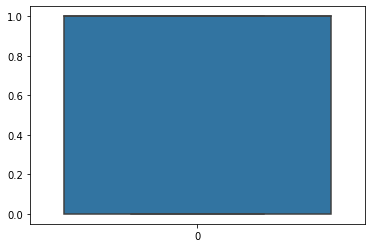

sex


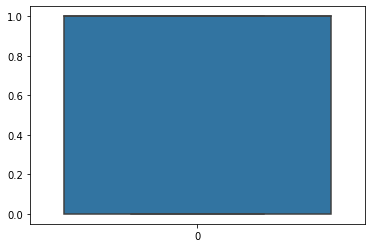

age


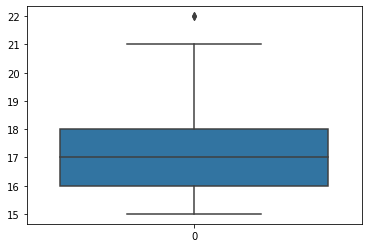

address


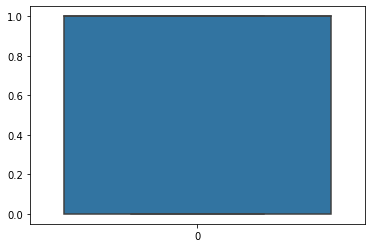

famsize


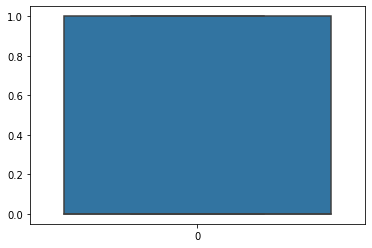

Pstatus


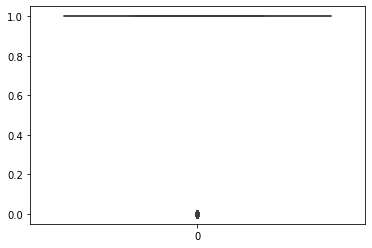

Medu


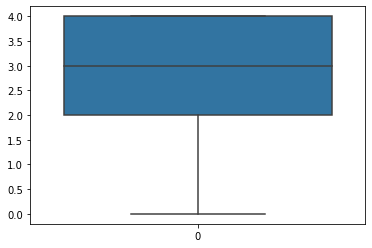

Fedu


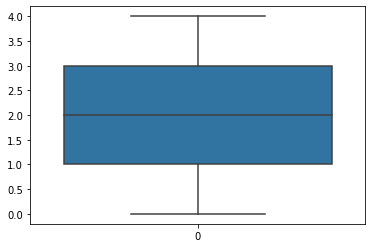

Mjob


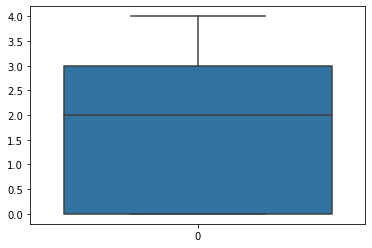

Fjob


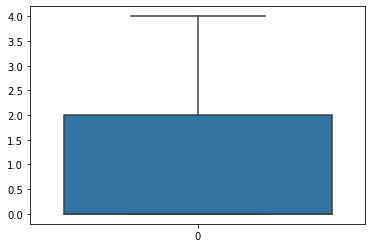

reason


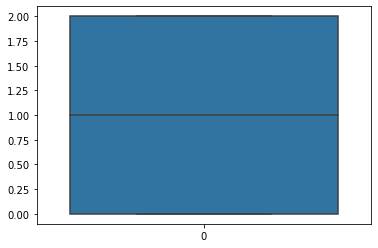

guardian


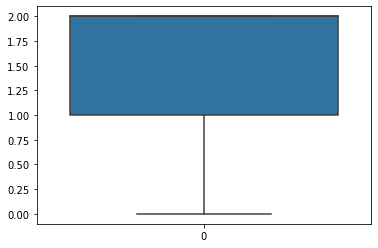

traveltime


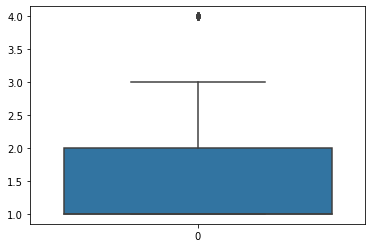

studytime


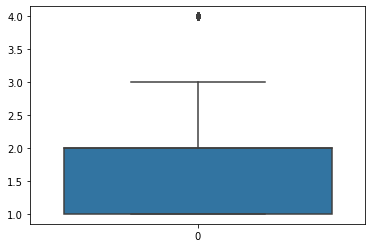

failures


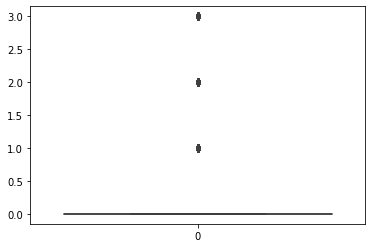

schoolsup


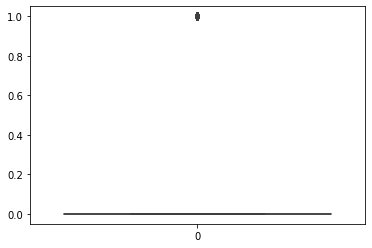

famsup


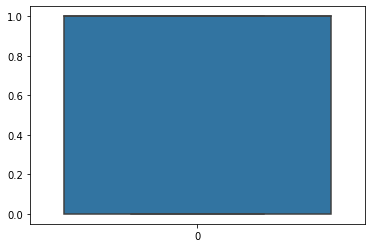

paid


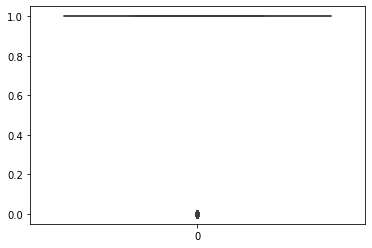

activities


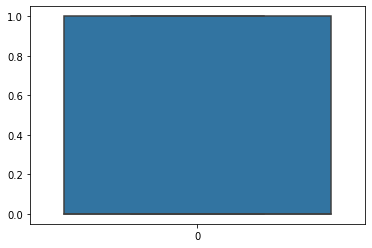

nursery


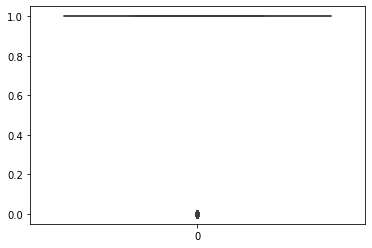

higher


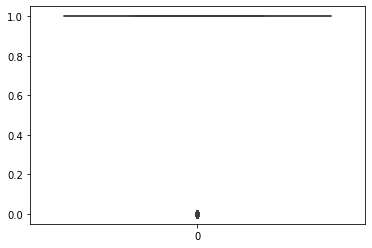

internet


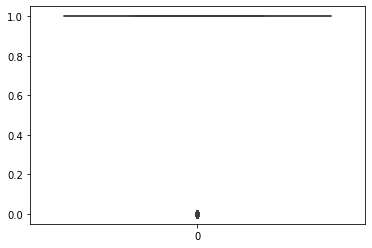

romantic


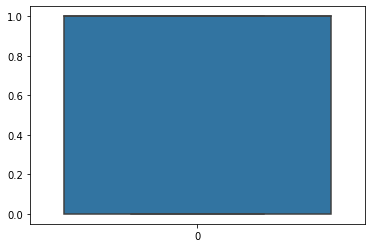

famrel


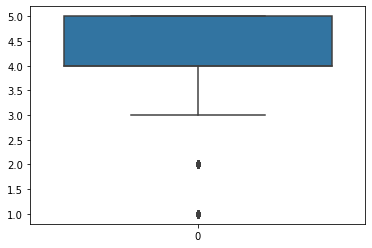

freetime


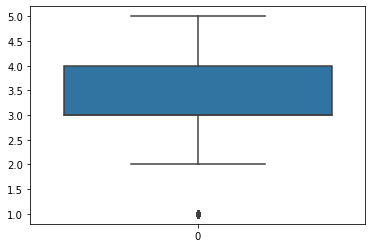

goout


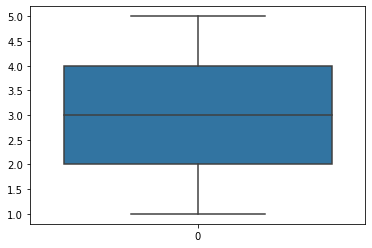

Dalc


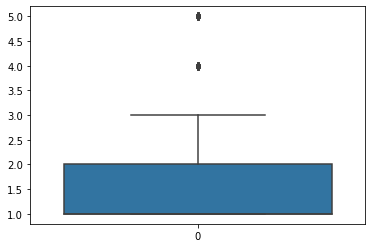

Walc


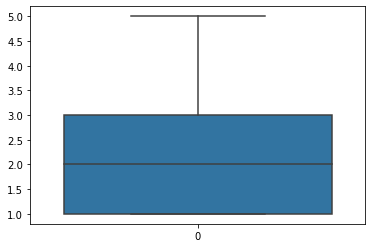

health


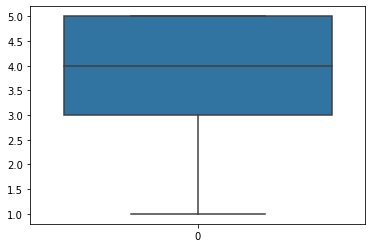

absences


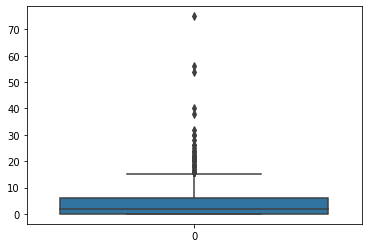

G1


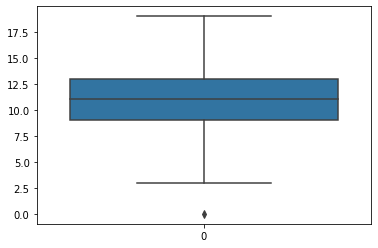

G2


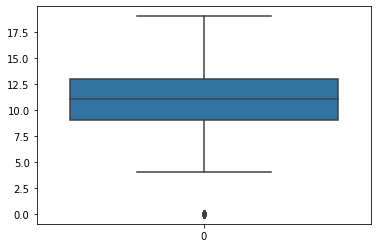

G3


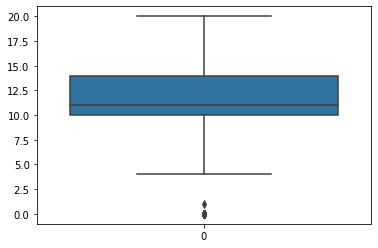

In [13]:
for i in data.columns.tolist():
  print(i)
  sns.boxplot(data=data[i])
  plt.show()

из интересных фактов, которые мы узнали по ящикам с усами: 
в школе учится студет которому 22, но это скорее второгодник, 
чем вброс данных
надо дропнуть айди

In [0]:
data.drop(['ID'], axis='columns', inplace=True)

### Нормализация данных
Именно нормализация, а не стандартизация, так как нам необходимо уменьшить расстояние, и отрицательные значения тут не к месту

сделаем нормализацию данных
тут я поняла что в некоторых других столбцах есть некоректные данные
так же объединим алкоголь в один столбец
и создадим столбец благополучия в семье  
так же оставим бинарным признакам их бинарность

In [0]:
def drop_bin(frame, norm):
  for seria in frame.columns.tolist():
    if (frame[seria].max() == 1) & (frame[seria].min() == 0):
      norm.drop([seria], axis='columns', inplace=True)

In [16]:
data_norm = pd.DataFrame(preprocessing.normalize(data), columns=list(data.columns))
#scaler = preprocessing.StandardScaler()
#scaler.fit(data)
#data_norm = pd.DataFrame(scaler.transform(data), columns=list(data.columns))

#data_norm['Alco'] = data_norm['Dalc'] + data_norm['Walc']
#data_norm.drop(['Dalc'], axis='columns', inplace=True)
#data_norm.drop(['Walc'], axis='columns', inplace=True)
data_norm.drop(['G2'], axis='columns', inplace=True)

#drop_bin(data, data_norm)

data_norm

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,0.030275,0.030275,0.030275,0.484404,0.030275,0.000000,0.000000,0.090826,0.121101,0.060550,0.000000,0.060550,0.030275,0.030275,0.030275,0.000000,0.0,0.000000,0.030275,0.000000,0.030275,0.030275,0.030275,0.030275,0.090826,0.060550,0.030275,0.030275,0.121101,0.151376,0.363303,0.454129,0.423853
1,0.027735,0.027735,0.027735,0.471495,0.027735,0.000000,0.027735,0.083205,0.055470,0.000000,0.000000,0.055470,0.055470,0.027735,0.055470,0.000000,0.0,0.000000,0.027735,0.027735,0.000000,0.027735,0.027735,0.027735,0.138675,0.083205,0.110940,0.027735,0.083205,0.083205,0.055470,0.471495,0.471495
2,0.039133,0.039133,0.000000,0.626128,0.039133,0.039133,0.039133,0.039133,0.078266,0.039133,0.078266,0.078266,0.078266,0.078266,0.039133,0.078266,0.0,0.000000,0.039133,0.000000,0.000000,0.039133,0.039133,0.039133,0.156532,0.156532,0.195665,0.117399,0.195665,0.195665,0.000000,0.352197,0.391330
3,0.030585,0.000000,0.000000,0.519948,0.030585,0.000000,0.030585,0.061170,0.091756,0.000000,0.061170,0.000000,0.030585,0.061170,0.061170,0.000000,0.0,0.000000,0.030585,0.030585,0.030585,0.030585,0.030585,0.030585,0.122341,0.122341,0.091756,0.030585,0.030585,0.091756,0.122341,0.428193,0.489363
4,0.034442,0.034442,0.034442,0.551069,0.034442,0.000000,0.034442,0.034442,0.034442,0.103325,0.000000,0.000000,0.068884,0.068884,0.034442,0.000000,0.0,0.034442,0.034442,0.000000,0.034442,0.034442,0.000000,0.034442,0.137767,0.103325,0.068884,0.034442,0.137767,0.172209,0.068884,0.413302,0.447744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.000000,0.038236,0.038236,0.573539,0.000000,0.000000,0.038236,0.114708,0.114708,0.076472,0.076472,0.038236,0.000000,0.076472,0.114708,0.076472,0.0,0.038236,0.000000,0.038236,0.038236,0.038236,0.038236,0.000000,0.152944,0.076472,0.038236,0.076472,0.114708,0.114708,0.305888,0.382360,0.382360
1040,0.040096,0.040096,0.000000,0.601445,0.000000,0.000000,0.040096,0.080193,0.040096,0.040096,0.080193,0.040096,0.080193,0.040096,0.080193,0.000000,0.0,0.000000,0.040096,0.040096,0.040096,0.040096,0.040096,0.000000,0.200482,0.160385,0.080193,0.040096,0.040096,0.200482,0.160385,0.400963,0.400963
1041,0.028820,0.000000,0.028820,0.461112,0.000000,0.028820,0.028820,0.028820,0.028820,0.086459,0.000000,0.057639,0.028820,0.086459,0.057639,0.000000,0.0,0.028820,0.028820,0.000000,0.028820,0.028820,0.000000,0.028820,0.144098,0.086459,0.057639,0.028820,0.028820,0.028820,0.000000,0.461112,0.518751
1042,0.040096,0.040096,0.000000,0.641542,0.040096,0.000000,0.040096,0.080193,0.040096,0.120289,0.000000,0.080193,0.080193,0.160385,0.040096,0.000000,0.0,0.000000,0.040096,0.000000,0.040096,0.040096,0.000000,0.040096,0.120289,0.080193,0.040096,0.040096,0.040096,0.080193,0.160385,0.360867,0.441060


### Корреляция

теперь посмотрим корреляцию наших данных


заменим малозначащие данные и данные между одинаковыми столбцами на один 
цвет, чтобы яркие зависимости были хорошо видны

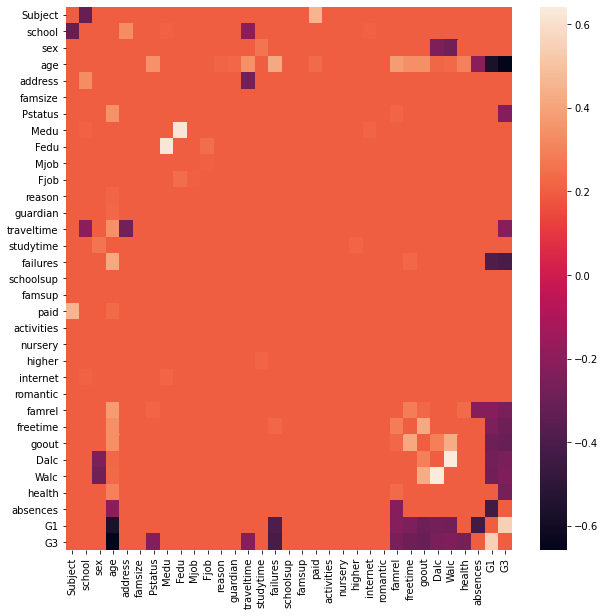

In [17]:
corr = data_norm.corr() 
fig, ax = plt.subplots(figsize=(10,10))    

for i in corr.columns.tolist():
  for j in corr.columns.tolist():
    if (-0.2 < corr[i][j] < 0.2) | (corr[i][j] == 1):
      corr[i][j] = 0.2
sns.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

# Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

1. Сравнить модели между собой
2. Дать интерпретацию весам признаков?

### Подготовка

Разделяем данные 

In [18]:
(trainD, testD, trainV, testV) = train_test_split(data_norm.drop('G3', axis=1),
                                            data_norm['G3'],
                                            test_size=0.3, 
                                            random_state=5)
(trainD1, testD1, trainV1, testV1) = train_test_split(data_norm.drop('G3', axis=1).drop('G1', axis=1),
                                            data_norm['G3'],
                                            test_size=0.3, 
                                            random_state=5)
trainD

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
842,0.033023,0.033023,0.033023,0.693481,0.033023,0.033023,0.033023,0.132092,0.132092,0.000000,0.000000,0.033023,0.000000,0.033023,0.099069,0.066046,0.000000,0.000000,0.000000,0.033023,0.033023,0.033023,0.033023,0.033023,0.099069,0.099069,0.066046,0.033023,0.033023,0.165115,0.000000,0.297206
179,0.000000,0.038264,0.000000,0.612223,0.038264,0.000000,0.038264,0.076528,0.076528,0.000000,0.000000,0.076528,0.038264,0.038264,0.076528,0.000000,0.000000,0.000000,0.038264,0.000000,0.038264,0.000000,0.038264,0.038264,0.153056,0.114792,0.191320,0.076528,0.153056,0.153056,0.153056,0.382639
880,0.027810,0.027810,0.027810,0.500580,0.027810,0.027810,0.000000,0.055620,0.055620,0.055620,0.000000,0.027810,0.055620,0.055620,0.055620,0.000000,0.000000,0.027810,0.027810,0.000000,0.027810,0.027810,0.027810,0.027810,0.111240,0.027810,0.111240,0.027810,0.083430,0.111240,0.278100,0.389340
42,0.033903,0.000000,0.000000,0.610257,0.000000,0.000000,0.033903,0.033903,0.000000,0.101710,0.101710,0.067806,0.000000,0.101710,0.033903,0.033903,0.033903,0.033903,0.033903,0.000000,0.033903,0.033903,0.000000,0.033903,0.135613,0.101710,0.067806,0.033903,0.033903,0.135613,0.000000,0.406838
540,0.036202,0.036202,0.036202,0.543036,0.036202,0.000000,0.036202,0.036202,0.036202,0.000000,0.000000,0.000000,0.036202,0.036202,0.072405,0.000000,0.000000,0.036202,0.036202,0.036202,0.000000,0.036202,0.036202,0.036202,0.144810,0.108607,0.072405,0.072405,0.108607,0.144810,0.072405,0.470632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0.033241,0.033241,0.033241,0.531858,0.033241,0.033241,0.033241,0.066482,0.066482,0.000000,0.099723,0.066482,0.033241,0.066482,0.066482,0.033241,0.033241,0.000000,0.033241,0.033241,0.033241,0.033241,0.033241,0.033241,0.132964,0.099723,0.099723,0.066482,0.066482,0.166206,0.465376,0.332411
73,0.000000,0.032342,0.032342,0.517477,0.032342,0.000000,0.032342,0.097027,0.064685,0.000000,0.000000,0.032342,0.064685,0.032342,0.064685,0.000000,0.000000,0.032342,0.000000,0.000000,0.032342,0.032342,0.032342,0.032342,0.032342,0.064685,0.064685,0.032342,0.064685,0.032342,0.452792,0.388108
998,0.000000,0.000000,0.025924,0.466628,0.000000,0.025924,0.025924,0.103695,0.103695,0.000000,0.000000,0.025924,0.051848,0.051848,0.077771,0.000000,0.000000,0.000000,0.025924,0.000000,0.025924,0.025924,0.025924,0.025924,0.129619,0.103695,0.103695,0.025924,0.025924,0.025924,0.000000,0.492552
206,0.000000,0.045883,0.045883,0.780013,0.045883,0.000000,0.045883,0.045883,0.045883,0.137649,0.000000,0.091766,0.045883,0.045883,0.091766,0.000000,0.000000,0.045883,0.045883,0.000000,0.000000,0.045883,0.045883,0.045883,0.229416,0.137649,0.137649,0.045883,0.045883,0.137649,0.183533,0.229416


напишем функцию считающую необходимые нам метрики 

In [0]:
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(true, pred)
    medae = metrics.median_absolute_error(true, pred)
    R2 = metrics.r2_score(true, pred)
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

Напишем функцию выполняющую визуализацию

In [0]:
def show_me(predictedV):
  sns.distplot(trainV, bins=100, hist=False, label='train')
  sns.distplot(testV, bins=100, hist=False, label='test')
  sns.distplot(predictedV, bins=100, hist=False, label='pred')
  plt.legend()
  plt.show()
def show_error(predictedV):
  error = testV - predictedV
  error = error.loc[error!=0]
  sns.distplot(error, bins=100, kde=False)
  plt.show()

## Линейная регрессия

Начнем с Гребневой регрессии

In [0]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 100, 0.1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')
ridgeModel.fit(trainD, trainV)
predictedV = ridgeModel.predict(testD)

визуализируем предсказание

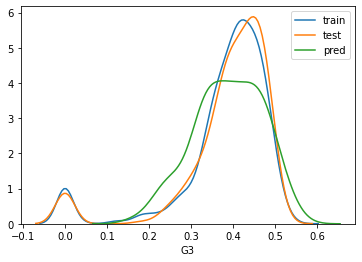

In [22]:
show_me(predictedV)

Визуализируем ошибку

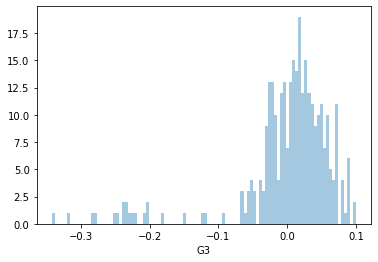

In [23]:
show_error(predictedV)

Выведем показатили тренировки и тестов

In [24]:
print('Testing')
calc_metrics(testV, predictedV)
print('Training')
calc_metrics(trainV, ridgeModel.predict(trainD))

Testing
MSE:   0.004902233767161775
RMSE:  0.0700159536617318
R2:    0.5845399649952789
MAE:   0.044381449206528555
MedAE: 0.028489906298409667
Training
MSE:   0.004754462582451747
RMSE:  0.06895261113585001
R2:    0.6162865265207706
MAE:   0.04338021625680916
MedAE: 0.028928148603336784


Лассо регрессия

In [25]:
lassoModel = linear_model.Lasso(alpha=0)
lassoModel.fit(trainD, trainV)
predictedV = lassoModel.predict(testD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.683965986812952, tolerance: 0.0009045180649299376
  positive)


Визуализируем предсказание

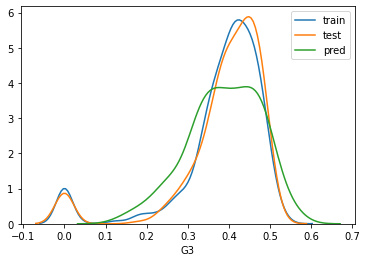

In [26]:
show_me(predictedV)

Визуализируем ошибку

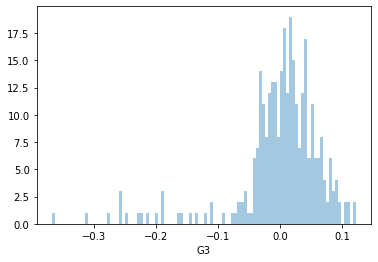

In [27]:
show_error(predictedV)

Выведем показатили тренировки и тестов

In [28]:
print('Testing')
calc_metrics(testV, predictedV)
print('Training')
calc_metrics(trainV, ridgeModel.predict(trainD))

Testing
MSE:   0.004786936107724238
RMSE:  0.06918768754427508
R2:    0.5943113410456738
MAE:   0.04489775977989524
MedAE: 0.03024194156642432
Training
MSE:   0.004754462582451747
RMSE:  0.06895261113585001
R2:    0.6162865265207706
MAE:   0.04338021625680916
MedAE: 0.028928148603336784


Выводы:
1. Обе регулиризации дали одинаковые результаты
2. линейный алгоритм плохо определяет 0 результаты
3. слишком равномерное предсказание
4. результаты плохие, нет смысла проверять без G1 (самого коррелирующего фактора для G3)

## Полиномиальная регрессия

Применим кросс валидацию для обнаружения лучшей степени 



Не будем брать слишком большую а то колаб ругается

In [29]:
rmses = []
degrees = np.arange(1, 6)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    d_poly_train = poly_features.fit_transform(trainD)

    poly_reg = linear_model.LinearRegression()
    poly_reg.fit(d_poly_train, trainV)

    # Compare with test data
    d_poly_test = poly_features.fit_transform(testD)
    poly_predict = poly_reg.predict(d_poly_test)
    poly_mse = mean_squared_error(testV, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))


Best degree 5 with RMSE 0.049357161475922035


отразим результаты на графике

Text(0, 0.5, 'RMSE')

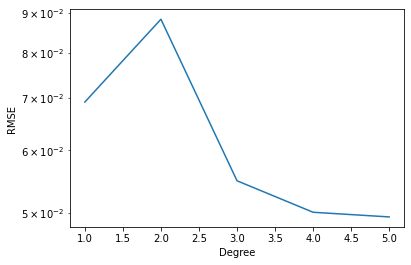

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Рассчитаем показатели для степени 5

In [31]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
d_poly_train = poly_features.fit_transform(trainD)

poly_reg = linear_model.LinearRegression()
poly_reg.fit(d_poly_train, trainV)

d_poly_test = poly_features.fit_transform(testD)
poly_predict = poly_reg.predict(d_poly_test)

print('Testing')
calc_metrics(testV, poly_predict)

Testing
MSE:   0.002436129388960242
RMSE:  0.049357161475922035
R2:    0.7935401595914853
MAE:   0.03411575829671281
MedAE: 0.023501001917631298


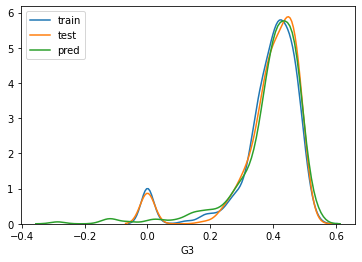

In [32]:
show_me(poly_predict)

И конечно же визуализируем ошибку

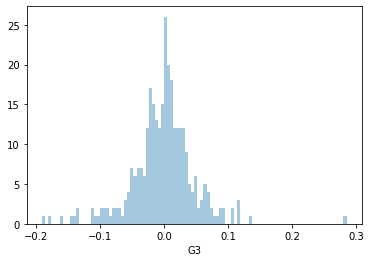

In [33]:
show_error(poly_predict)

Как мы видим, в целом данные предсказываются довольно неплохо, 
Так что здесь уже представляет интерес проверить, как будет работать алгоритм на тренеровочных данных без G1

In [0]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
d_poly_train = poly_features.fit_transform(trainD1)

poly_reg = linear_model.LinearRegression()
poly_reg.fit(d_poly_train, trainV1)

d_poly_test = poly_features.fit_transform(testD1)
poly_predict = poly_reg.predict(d_poly_test)


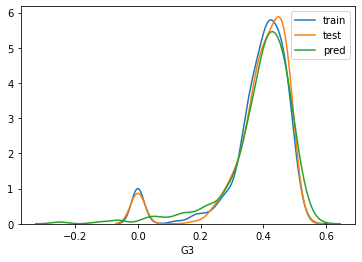

In [35]:
show_me(poly_predict)

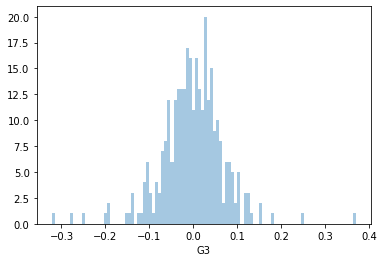

In [36]:
show_error(poly_predict)

In [37]:
print('Testing')
calc_metrics(testV1, poly_predict)

Testing
MSE:   0.0050462161952703226
RMSE:  0.07103672427181819
R2:    0.5723375798249212
MAE:   0.05135853888963814
MedAE: 0.038877300890751615


Получили вполне ожидаемые результаты:
1. Полиномиальная регрессия большой степени предсказывает данные лучше, чем линейная
2. Мы взяли степень недостаточно большую, чтобы модель переучивалась 
3. При исключении признака G1, ошибка предсказания возрастает
4. Для Полиномиальной регрессии так же трудно определить кто завалил итоговый экзамен 

## К соседей

### С G1

Начнем кросс валидацию

In [38]:
knn2 = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5,scoring='explained_variance')

knn_gscv.fit(trainD, trainV)
knn_gscv.best_params_

{'n_neighbors': 7}

вычислили лучшие параметры, теперь можно и посмотреть а что там с данными 

In [0]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(trainD, trainV)
predictedV = knn.predict(testD)

Визуализация!

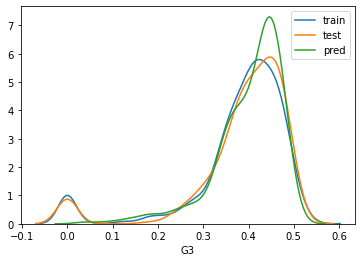

In [40]:
show_me(predictedV)

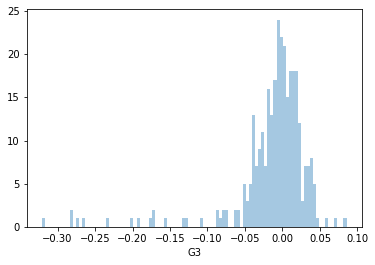

In [41]:
show_error(predictedV)

In [42]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.0029388159886738372
RMSE:  0.054210847518497966
R2:    0.7509379088150339
MAE:   0.029777967009052445
MedAE: 0.01761594023549179


### Без G1

In [43]:
knn2 = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring='explained_variance')

knn_gscv.fit(trainD1, trainV1)
knn_gscv.best_params_

{'n_neighbors': 6}

In [0]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(trainD1, trainV1)
predictedV = knn.predict(testD1)

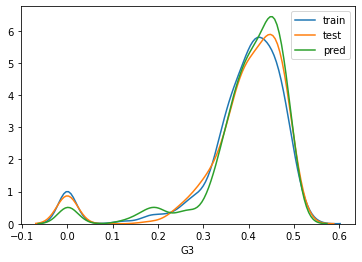

In [45]:
show_me(predictedV)

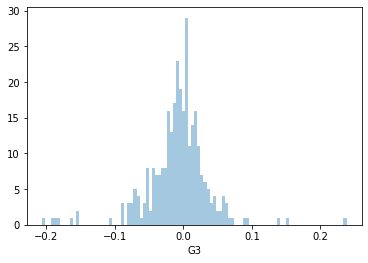

In [46]:
show_error(predictedV)

In [47]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.002041351481353202
RMSE:  0.0451813178355081
R2:    0.8269972428526269
MAE:   0.02905844365811148
MedAE: 0.018219753404798006


## радиус

Кросс валидация

In [48]:
rnr = RadiusNeighborsRegressor()
param_grid = {'radius': np.arange(0.3,1.1, 0.01)}
rnr_gscv = GridSearchCV(rnr, param_grid, cv=5)
rnr_gscv.fit(trainD, trainV)
rnr_gscv.best_params_

{'radius': 0.3}

Предсказание

In [0]:
rnr = RadiusNeighborsRegressor(radius = rnr_gscv.best_params_['radius'])
rnr.fit(trainD, trainV)
predictedV = rnr.predict(testD)

Визуалия

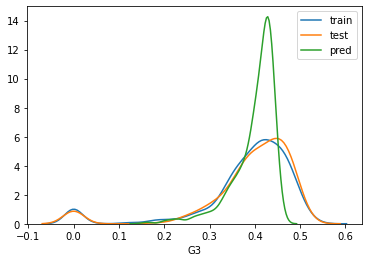

In [50]:
show_me(predictedV)

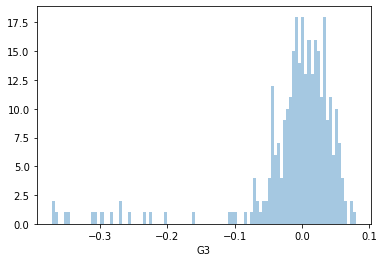

In [51]:
show_error(predictedV)

In [52]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.005524102806124225
RMSE:  0.07432430831245068
R2:    0.5318371064685478
MAE:   0.04057709499008709
MedAE: 0.024711718675144406


Как видно невооруженным глазом, метрика просто ужасно предсказала значения


Пробовать без G1 бессмысленно 

## деревья решений

### C G1

Кросс валидация

In [53]:
reg_tree = DecisionTreeRegressor()

param_grid = {'max_depth': np.arange(1, 100)}

reg_tree_gscv = GridSearchCV(reg_tree, param_grid, cv=5)

reg_tree_gscv.fit(trainD, trainV)
reg_tree_gscv.best_params_

{'max_depth': 85}

Предсказание

In [0]:
reg_tree = DecisionTreeRegressor(max_depth = reg_tree_gscv.best_params_['max_depth'])
reg_tree.fit(trainD, trainV)
predictedV = reg_tree.predict(testD)

Визуал

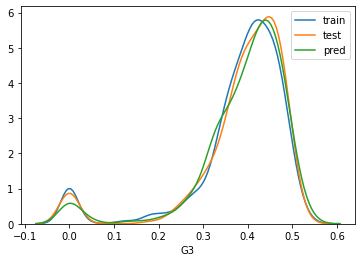

In [55]:
show_me(predictedV)

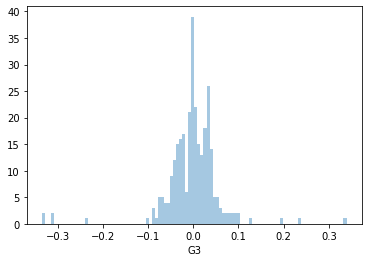

In [56]:
show_error(predictedV)

In [57]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.0034506053590412965
RMSE:  0.058741853554695536
R2:    0.7075642061670238
MAE:   0.03402421928074225
MedAE: 0.02616757641417744


### Без G1

In [58]:
reg_tree = DecisionTreeRegressor()

param_grid = {'max_depth': np.arange(1, 100)}

reg_tree_gscv = GridSearchCV(reg_tree, param_grid, cv=5)

reg_tree_gscv.fit(trainD1, trainV1)
reg_tree_gscv.best_params_

{'max_depth': 5}

In [0]:
reg_tree = DecisionTreeRegressor(max_depth = reg_tree_gscv.best_params_['max_depth'])
reg_tree.fit(trainD1, trainV1)
predictedV = reg_tree.predict(testD1)

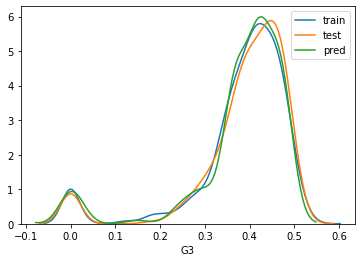

In [60]:
show_me(predictedV)

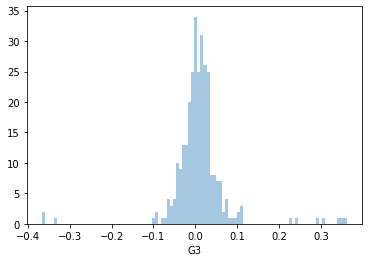

In [61]:
show_error(predictedV)

In [62]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.00442129622036895
RMSE:  0.06649282833786627
R2:    0.6252990025108063
MAE:   0.034324996810594026
MedAE: 0.020556112892091083


Выводы:
1. Как же хорошо Деревья Решений апроксимируют значения!!!
2. Конечно, камнем преткновения до сих пор остаются 0 
3. Результат без G1 конечно хуже, но совсем ненамного!!!

**Сравнение различных моделей**

Таким образом, древья решений показали самую высокую способность  к апроксимированию данных

Остальным моделям было сложнее в виду того что данные не расположены линейно, не полиномиально и люди с одинаковыми оценками имеют разные параметры, так что 
остальные модели не смогли полно предсказать данные

# Часть 3. Классификация

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


1. сформулировать правило на основании которых принимается решение
4. сравнить деревья на различных итерациях 
5. сделать выводы

## Бинарная классификация

### Подготовка данных

In [0]:
def leave_bin(frame, norm):
  for seria in frame.columns.tolist():
    if (frame[seria].max() == 1) & (frame[seria].min() == 0):
      norm[seria] = frame[seria]

In [64]:
data_bin = data_norm.copy()
data_bin.drop(['G1'], axis='columns', inplace=True)
data_bin.drop(['G3'], axis='columns', inplace=True)
data_bin['Pass'] = np.where((data['G3'] > 8),1,0)
leave_bin(data, data_bin)
data_bin['is anybody home'] = np.where((data['Mjob'] == 3)|(data['Fjob'] == 3),1,0)
data_bin

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Pass,is anybody home
0,1,1,1,0.484404,1,0,0,0.090826,0.121101,0.060550,0.000000,0.060550,0.030275,0.030275,0.030275,0.000000,0,0,1,0,1,1,1,1,0.090826,0.060550,0.030275,0.030275,0.121101,0.151376,0.363303,1,0
1,1,1,1,0.471495,1,0,1,0.083205,0.055470,0.000000,0.000000,0.055470,0.055470,0.027735,0.055470,0.000000,0,0,1,1,0,1,1,1,0.138675,0.083205,0.110940,0.027735,0.083205,0.083205,0.055470,1,0
2,1,1,0,0.626128,1,1,1,0.039133,0.078266,0.039133,0.078266,0.078266,0.078266,0.078266,0.039133,0.078266,0,0,1,0,0,1,1,1,0.156532,0.156532,0.195665,0.117399,0.195665,0.195665,0.000000,1,0
3,1,0,0,0.519948,1,0,1,0.061170,0.091756,0.000000,0.061170,0.000000,0.030585,0.061170,0.061170,0.000000,0,0,1,1,1,1,1,1,0.122341,0.122341,0.091756,0.030585,0.030585,0.091756,0.122341,1,0
4,1,1,1,0.551069,1,0,1,0.034442,0.034442,0.103325,0.000000,0.000000,0.068884,0.068884,0.034442,0.000000,0,1,1,0,1,1,0,1,0.137767,0.103325,0.068884,0.034442,0.137767,0.172209,0.068884,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,1,0.573539,0,0,1,0.114708,0.114708,0.076472,0.076472,0.038236,0.000000,0.076472,0.114708,0.076472,0,1,0,1,1,1,1,0,0.152944,0.076472,0.038236,0.076472,0.114708,0.114708,0.305888,1,0
1040,1,1,0,0.601445,0,0,1,0.080193,0.040096,0.040096,0.080193,0.040096,0.080193,0.040096,0.080193,0.000000,0,0,1,1,1,1,1,0,0.200482,0.160385,0.080193,0.040096,0.040096,0.200482,0.160385,1,0
1041,1,0,1,0.461112,0,1,1,0.028820,0.028820,0.086459,0.000000,0.057639,0.028820,0.086459,0.057639,0.000000,0,1,1,0,1,1,0,1,0.144098,0.086459,0.057639,0.028820,0.028820,0.028820,0.000000,1,1
1042,1,1,0,0.641542,1,0,1,0.080193,0.040096,0.120289,0.000000,0.080193,0.080193,0.160385,0.040096,0.000000,0,0,1,0,1,1,0,1,0.120289,0.080193,0.040096,0.040096,0.040096,0.080193,0.160385,1,1


In [0]:
lab_enc = preprocessing.LabelEncoder()
data_bin['Pass']=lab_enc.fit_transform(data_bin['Pass'])

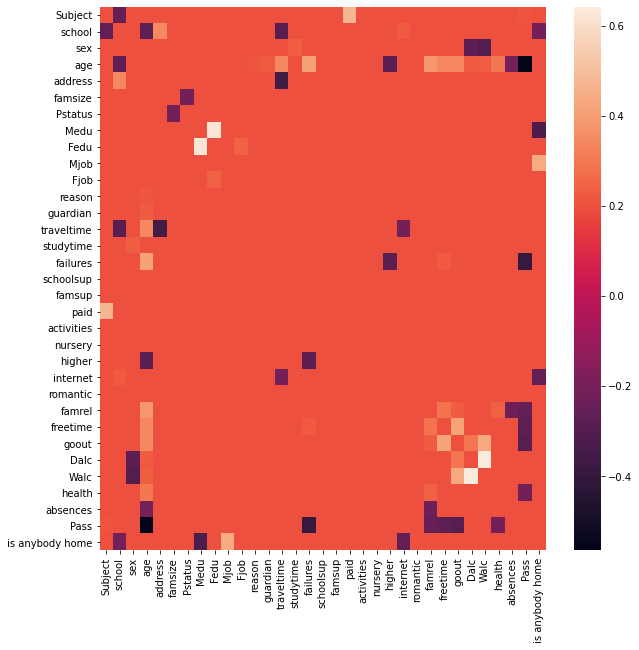

In [66]:
corr = data_bin.corr() 
fig, ax = plt.subplots(figsize=(10,10))    

for i in corr.columns.tolist():
  for j in corr.columns.tolist():
    if (-0.2 < corr[i][j] < 0.2) | (corr[i][j] == 1):
      corr[i][j] = 0.2
sns.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

In [0]:
(trainD, testD, trainV, testV) = train_test_split(data_bin.drop('Pass', axis=1),
                                            data_bin['Pass'],
                                            test_size=0.3, 
                                            random_state=5)

In [0]:
def print_ac(y_test, y_pred):
  print('\t\tconfusion_matrix')
  print(confusion_matrix(y_test, y_pred))
  print('\t\tclassification_report')
  print(classification_report(y_test, y_pred))
  print('\t\roc_auc_score')
  print(roc_auc_score(y_test, y_pred, average='micro', sample_weight=None, max_fpr=None))


In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### KNN 

Бежим кросс

In [70]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')

knn_gscv.fit(trainD, trainV)
knn_gscv.best_params_

{'n_neighbors': 8}

Тренируем

In [0]:
knn = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn.fit(trainD, trainV)
predictedV = knn.predict(testD)

Визуализируем

		confusion_matrix
[[  3  43]
 [  4 264]]
		classification_report
              precision    recall  f1-score   support

           0       0.43      0.07      0.11        46
           1       0.86      0.99      0.92       268

    accuracy                           0.85       314
   macro avg       0.64      0.53      0.52       314
weighted avg       0.80      0.85      0.80       314

oc_auc_score
0.5251460090850097


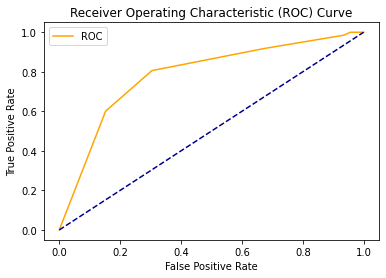

In [72]:
print_ac(testV, predictedV)
probs = knn.predict_proba(testD)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(testV, preds)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr, tpr)

Выводы: 
1. Таким образом модель хорошо предсказывает сдачу экзамена, но неудовлятворительные оценки все же ставит некорректно

### Radius Neighbors

Кроссим

In [73]:
rnr = RadiusNeighborsClassifier()
param_grid = {'radius': np.arange(2.1,3.0, 0.01)}
rnr_gscv = GridSearchCV(rnr, param_grid, cv=5)
rnr_gscv.fit(trainD, trainV)
rnr_gscv.best_params_

{'radius': 2.249999999999997}

тестим

In [0]:
rnr = RadiusNeighborsClassifier(radius=rnr_gscv.best_params_['radius'])
rnr.fit(trainD, trainV)
predictedV = rnr.predict(testD)

смотрим

		confusion_matrix
[[  0  46]
 [  0 268]]
		classification_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.85      1.00      0.92       268

    accuracy                           0.85       314
   macro avg       0.43      0.50      0.46       314
weighted avg       0.73      0.85      0.79       314

oc_auc_score
0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


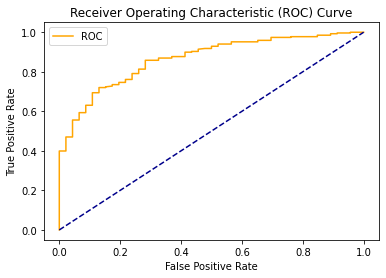

In [75]:
print_ac(testV, predictedV)
probs = rnr.predict_proba(testD)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(testV, preds)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr, tpr)

Данная модель предсказывает что все ученики сдадут, что не является верным 

### Логистическая регрессия

In [76]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(trainD,trainV)
predictedV = logistic.predict(testD)
predictedV

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

Смотр 

		confusion_matrix
[[ 11  35]
 [  1 267]]
		classification_report
              precision    recall  f1-score   support

           0       0.92      0.24      0.38        46
           1       0.88      1.00      0.94       268

    accuracy                           0.89       314
   macro avg       0.90      0.62      0.66       314
weighted avg       0.89      0.89      0.86       314

oc_auc_score
0.6176995457495134


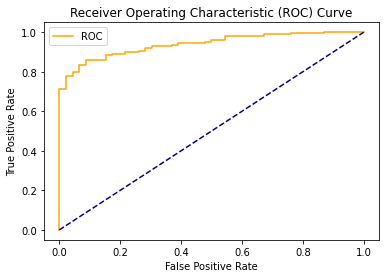

In [77]:
print_ac(testV, predictedV)
probs = logistic.predict_proba(testD)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(testV, preds)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr, tpr)

Модель довольно таки точно определяет учеников которые сдадут и нет. Это видно как по показателям так и на графике

### Деревья решений

Валидация

In [78]:
from sklearn.tree import DecisionTreeClassifier
reg_tree = DecisionTreeClassifier()

param_grid = {'max_depth': np.arange(1, 100)}

reg_tree_gscv = GridSearchCV(reg_tree, param_grid, cv=5)

reg_tree_gscv.fit(trainD, trainV)
reg_tree_gscv.best_params_

{'max_depth': 80}

Тренировка

In [79]:
reg_tree = DecisionTreeClassifier(max_depth = reg_tree_gscv.best_params_['max_depth'])
reg_tree.fit(trainD, trainV)
predictedV = reg_tree.predict(testD)
predictedV

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

Визуально проверяем

		confusion_matrix
[[ 29  17]
 [ 11 257]]
		classification_report
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        46
           1       0.94      0.96      0.95       268

    accuracy                           0.91       314
   macro avg       0.83      0.79      0.81       314
weighted avg       0.91      0.91      0.91       314

oc_auc_score
0.7946950032446465


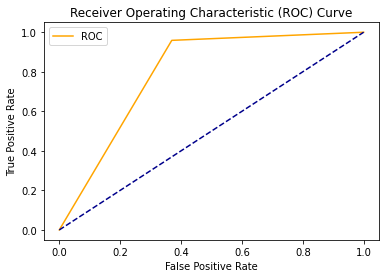

In [80]:
print_ac(testV, predictedV)
probs = reg_tree.predict_proba(testD)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(testV, preds)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_curve(fpr, tpr)

результат предсказания во многом схож с логичтической регрессией

### Построение дерева

In [0]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

Tree parameters
		confusion_matrix
[[ 25   3]
 [  9 172]]
		classification_report
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        28
           1       0.98      0.95      0.97       181

    accuracy                           0.94       209
   macro avg       0.86      0.92      0.89       209
weighted avg       0.95      0.94      0.94       209

oc_auc_score
0.9215666929755327


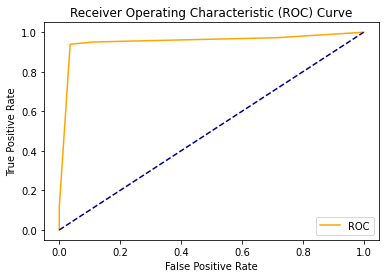

Tree parameters
		confusion_matrix
[[ 21  11]
 [  9 168]]
		classification_report
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        32
           1       0.94      0.95      0.94       177

    accuracy                           0.90       209
   macro avg       0.82      0.80      0.81       209
weighted avg       0.90      0.90      0.90       209

oc_auc_score
0.8027012711864407


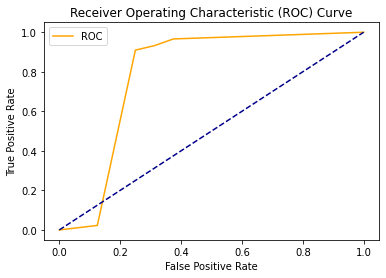

Tree parameters
		confusion_matrix
[[ 26  13]
 [  4 166]]
		classification_report
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        39
           1       0.93      0.98      0.95       170

    accuracy                           0.92       209
   macro avg       0.90      0.82      0.85       209
weighted avg       0.92      0.92      0.91       209

oc_auc_score
0.8215686274509805


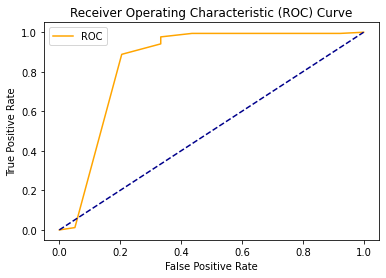

Tree parameters
		confusion_matrix
[[ 27   7]
 [  6 169]]
		classification_report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.96      0.97      0.96       175

    accuracy                           0.94       209
   macro avg       0.89      0.88      0.88       209
weighted avg       0.94      0.94      0.94       209

oc_auc_score
0.8799159663865547


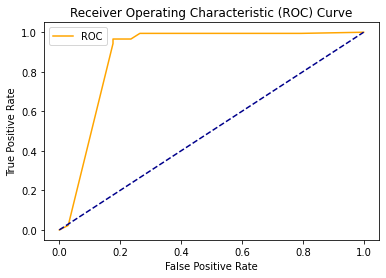

Tree parameters
		confusion_matrix
[[ 26   8]
 [  9 165]]
		classification_report
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        34
           1       0.95      0.95      0.95       174

    accuracy                           0.92       208
   macro avg       0.85      0.86      0.85       208
weighted avg       0.92      0.92      0.92       208

oc_auc_score
0.8564908722109533


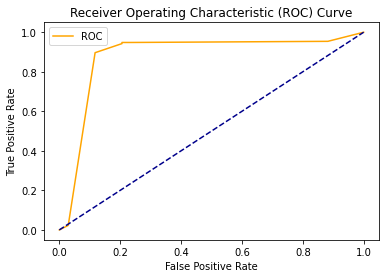

In [92]:
for train_index, test_index in kf.split(data_bin):

  X_train, X_test = data_bin.drop('Pass', axis=1).iloc[train_index], data_bin.drop('Pass', axis=1).iloc[test_index]
  y_train, y_test = data_bin['Pass'][train_index], data_bin['Pass'][test_index]

  reg_tree = DecisionTreeClassifier(max_depth=5)
  reg_tree.fit(X_train, y_train)
  predictedV = reg_tree.predict(X_test)

  print('Tree parameters')
  print_ac(y_test, predictedV)

  probs = reg_tree.predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)
  plot_roc_curve(fpr, tpr)

Выводы:
1. Наилучший результат получился без разбиения, но по кривой видно что тут имеет место  быть переобучение
2. далее можно заметить что с увеличением количества разбиений, уменьшается ошибка и увеличивается точность

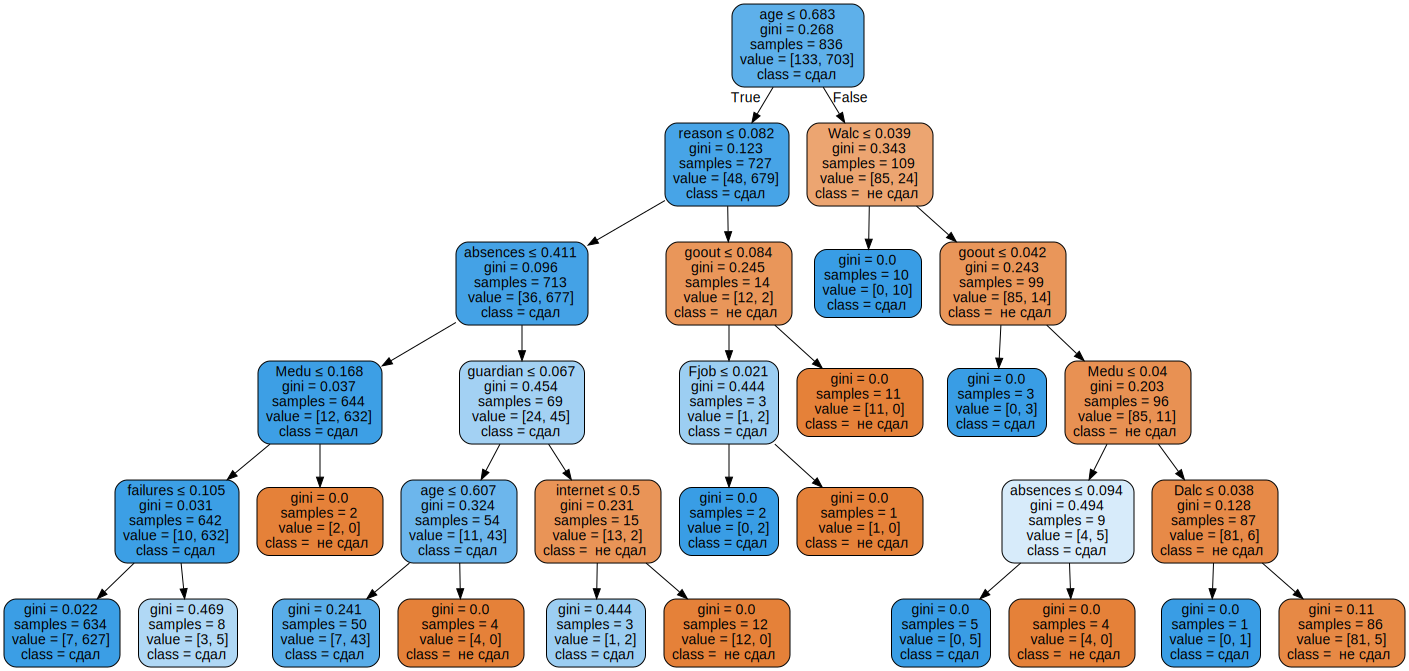

In [94]:
dot_data = tree.export_graphviz(reg_tree, feature_names=list(trainD.columns), class_names=[' не сдал ','сдал'],  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,)

graph = graphviz.Source(dot_data)
graph

**Правило выбора**

Ну, очевидно, что дерево работает следущем образом: отбираются определенные признаки, и на правиле больше-мегьше распределяются оценки

Если обобщить правило данного дерева: если у тебя много провалов, задолжностей, 
ты употребляешь алко, да и на первом курсе в 22, то на хорошую оценку не расчитывай. Так же играют роль гены как матери и отца. Так же вероятность не сдать экзамен увеличивается при принятии решения потратить много времени на прогулку с друзьями

### Вывод
Лучшей как по точности так и по другим рассмотренным мной метрикам оказались модели логистической регрессии и деревья решений, в виду специфики датасета

## Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

### Подготовка данных

Создание датасета

In [0]:
def rule(g):
  if 18 <= g <= 20 :
    return 5
  elif 14 <= g <= 17:
    return 4
  elif 8 <= g <= 13:
    return 3
  else:
    return 2

In [96]:
data_mark = data_bin.copy()
data_mark.drop(['Pass'], axis='columns', inplace=True)
data_mark['Mark'] = data.apply(lambda x: rule(x['G3']), axis =  1)
data_mark['Mark'].describe()

count    1044.000000
mean        3.219349
std         0.655948
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Mark, dtype: float64

Разделение данных

In [0]:
(trainD, testD, trainV, testV) = train_test_split(data_mark.drop('Mark', axis=1),
                                            data_mark['Mark'],
                                            test_size=0.3, 
                                            random_state=5)

### KNN 

Кросс

In [0]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5,scoring='explained_variance')

knn_gscv.fit(trainD, trainV)
knn_gscv.best_params_

Предсказание

In [98]:
knn = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn.fit(trainD, trainV)
predictedV = knn.predict(testD)
predictedV

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3,
       3, 3, 4, 2, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3,
       4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 4, 3, 3, 4,

Посмотрим

In [100]:
print(classification_report(testV, predictedV))

              precision    recall  f1-score   support

           2       0.50      0.12      0.19        26
           3       0.67      0.87      0.76       191
           4       0.53      0.36      0.43        86
           5       0.00      0.00      0.00        11

    accuracy                           0.64       314
   macro avg       0.43      0.34      0.34       314
weighted avg       0.59      0.64      0.59       314



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Вывод**

Как видно у модели большие проблемы с определением оценки отлично, как и с другими оценками кроме полюбившейся ей средней 3

### Radius Neighbors

Кр кр кросс

In [101]:
rnr = RadiusNeighborsClassifier()
param_grid = {'radius': np.arange(2.1,3.0, 0.01)}
rnr_gscv = GridSearchCV(rnr, param_grid, cv=5)
rnr_gscv.fit(trainD, trainV)
rnr_gscv.best_params_

{'radius': 2.1}

Магия

In [102]:
rnr = RadiusNeighborsClassifier(radius=rnr_gscv.best_params_['radius'])
rnr.fit(trainD, trainV)
predictedV = rnr.predict(testD)
predictedV

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

Визуальная

In [103]:
print(classification_report(testV, predictedV))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        26
           3       0.61      1.00      0.76       191
           4       0.00      0.00      0.00        86
           5       0.00      0.00      0.00        11

    accuracy                           0.61       314
   macro avg       0.15      0.25      0.19       314
weighted avg       0.37      0.61      0.46       314



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Вывод**

Ну тут как всегда лажа, тупо 3 везде предсказывает, такое себе, зато точность на 3 61 процент)

### Логистическая регрессия

In [104]:
logistic = LogisticRegression()
logistic.fit(trainD,trainV)
predictedV = logistic.predict(testD)
predictedV

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3,
       4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3,

Визуальная

In [105]:
print(classification_report(testV, predictedV))

              precision    recall  f1-score   support

           2       1.00      0.19      0.32        26
           3       0.71      0.96      0.82       191
           4       0.73      0.44      0.55        86
           5       0.00      0.00      0.00        11

    accuracy                           0.72       314
   macro avg       0.61      0.40      0.42       314
weighted avg       0.72      0.72      0.67       314



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Вывод**

Тут уже ситуация получше, двойку предсказывает идеально, до отлично не добираемся, ставим 4 или 3

Но по сравнению с остальными моделями результат потрясающий

### Деревья решений

In [108]:
reg_tree = DecisionTreeClassifier()

param_grid = {'max_depth': np.arange(1, 100)}

reg_tree_gscv = GridSearchCV(reg_tree, param_grid, cv=5)

reg_tree_gscv.fit(trainD, trainV)
reg_tree_gscv.best_params_

{'max_depth': 8}

Предсказание

In [111]:
reg_tree = DecisionTreeClassifier(max_depth = reg_tree_gscv.best_params_['max_depth'])
reg_tree.fit(trainD, trainV)
predictedV = reg_tree.predict(testD)
predictedV

array([3, 3, 5, 3, 3, 3, 5, 5, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3,
       3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       5, 3, 3, 2, 4, 3, 2, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3,
       3, 3, 4, 2, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 5,
       4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 2, 4, 3, 3, 4, 3, 4, 3,
       3, 4, 3, 3, 3, 4, 3, 5, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 5, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3,
       2, 3, 3, 3, 4, 4, 5, 3, 2, 3, 3, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3,
       2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 4, 4, 3, 3, 4,
       4, 4, 3, 3, 3, 2, 4, 3, 5, 3, 2, 3, 3, 4, 3, 5, 3, 4, 2, 3, 3, 4,
       3, 4, 3, 3, 5, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2,
       4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 4, 2, 3, 3, 3,
       4, 4, 4, 3, 3, 3, 3, 4, 4, 2, 4, 4, 3, 3, 4,

Визуал

In [110]:
print(classification_report(testV, predictedV))

              precision    recall  f1-score   support

           2       0.74      0.54      0.62        26
           3       0.85      0.90      0.87       191
           4       0.77      0.74      0.76        86
           5       0.60      0.55      0.57        11

    accuracy                           0.81       314
   macro avg       0.74      0.68      0.71       314
weighted avg       0.81      0.81      0.81       314



**Вывод**

Тут модель хотя бы выбирает 5!!!
В среднем точность у деревьев намного выше чем у остальных моделей, но ту же 2 лучше смотрит логистическая регрессия

## **Вывод**
Лучшими моделями снова стали деревья решений и логистическая регрессия, хотя логика не выбирала 5, но на других оценках ее показатели точности выше

## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.